In [1]:
import pandas as pd
import numpy as np

In [28]:
# Access landmarks
landmark_file = 'hand_landmarks.csv'

df = pd.read_csv(landmark_file)
df.head()

,image_path,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,...,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
0,data/train/V/V1689.jpg,V,0.146082,0.995708,1.545819e-06,0.244944,0.941086,-0.065237,0.281415,0.823256,...,-0.055412,0.021456,0.750193,-0.115226,0.060950,0.794560,-0.107964,0.071341,0.839648,-0.085980
1,data/train/V/V1325.jpg,V,0.383886,0.519048,7.559095e-07,0.433394,0.464155,-0.024322,0.435529,0.393791,...,-0.029178,0.303208,0.380120,-0.059477,0.326852,0.410242,-0.052638,0.339884,0.437979,-0.037736
2,data/train/V/V363.jpg,V,0.328156,0.708991,8.739068e-07,0.371723,0.655641,-0.015050,0.375257,0.576066,...,-0.049157,0.260628,0.528728,-0.086287,0.274187,0.562190,-0.079365,0.288631,0.598877,-0.063287
3,data/train/V/V191.jpg,V,0.213111,0.834933,1.331898e-06,0.325386,0.753753,-0.045712,0.338054,0.598511,...,-0.032997,0.103508,0.542042,-0.093412,0.131851,0.605885,-0.091057,0.140801,0.660474,-0.073259
4,data/train/V/V2476.jpg,V,0.452915,0.518620,8.777448e-07,0.501326,0.458547,-0.032426,0.510890,0.382909,...,-0.029607,0.343304,0.386188,-0.067248,0.379228,0.413846,-0.061586,0.404624,0.446942,-0.046208


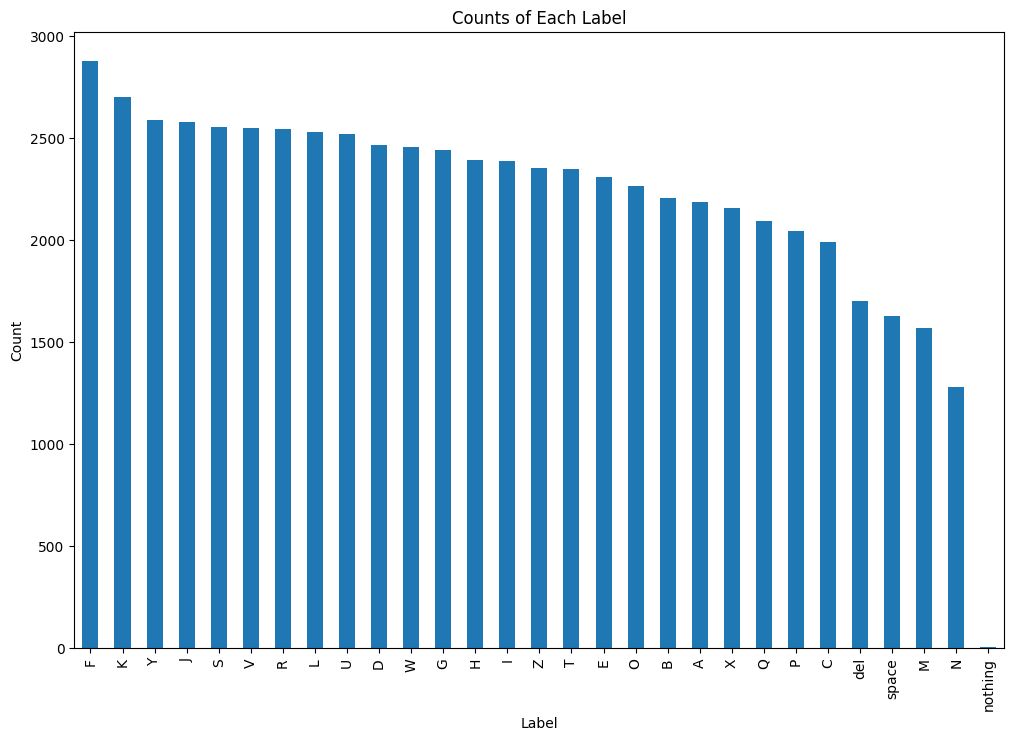

In [9]:
# Plot number of rows per value
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar')
plt.title('Counts of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

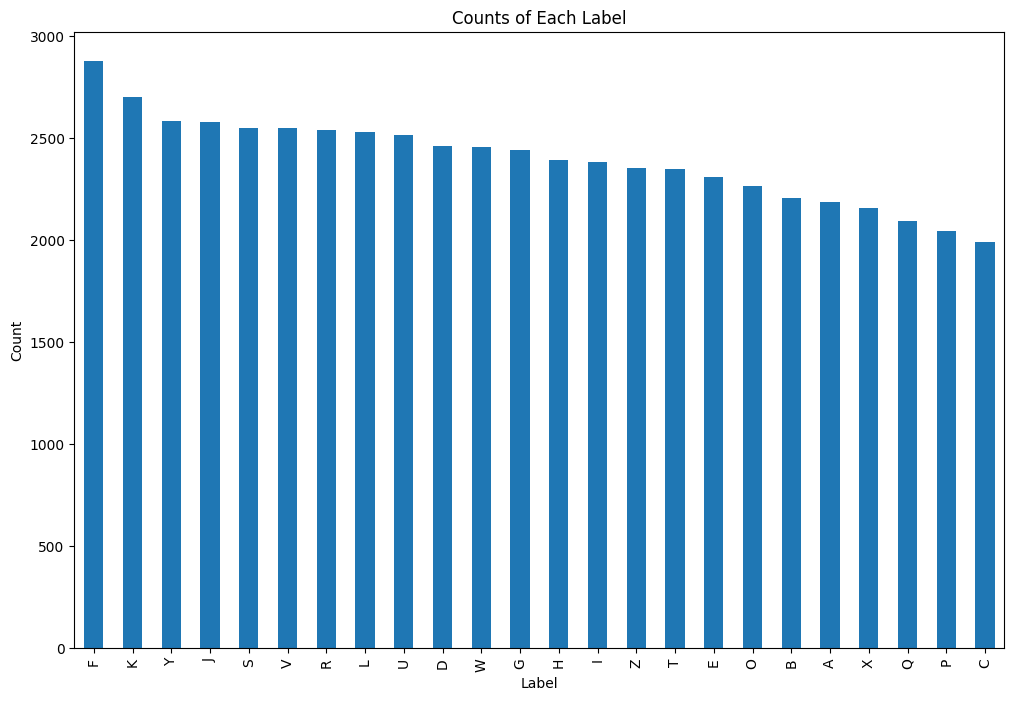

In [11]:
# Drop characters that are not wanted (either not enough data or unwanted gesture)
to_drop = ['del', 'space', 'nothing', 'M', 'N']

for char in to_drop:
    df = df.drop(df[df['label'] == char].index)

label_counts = df['label'].value_counts()
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar')
plt.title('Counts of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [13]:
# Randomly select rows from each value such that there are 1988 of each
target_count = 1988
df_balanced = df.groupby('label').apply(lambda x: x.sample(n=target_count, replace=False if len(x) > target_count else True)).reset_index(drop=True)
df_balanced['label'].value_counts()

label
A    1988
B    1988
Y    1988
X    1988
W    1988
V    1988
U    1988
T    1988
S    1988
R    1988
Q    1988
P    1988
O    1988
L    1988
K    1988
J    1988
I    1988
H    1988
G    1988
F    1988
E    1988
D    1988
C    1988
Z    1988
Name: count, dtype: int64


/tmp/ipykernel_2789/5649743.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('label').apply(lambda x: x.sample(n=target_count, replace=False if len(x) > target_count else True)).reset_index(drop=True)


In [17]:
# Create a DataFrame with 1988 rows of placeholder data
image_path = 'null'
label = 'nothing'
num_landmarks = 21
placeholder_landmarks = [image_path, label] + [-1] * (num_landmarks * 3)
placeholder_df = pd.DataFrame([placeholder_landmarks] * 1988, columns=['image_path', 'label'] + [f'{coord}_{i}' for i in range(num_landmarks) for coord in ('x', 'y', 'z')])
df_with_placeholders = pd.concat([df, placeholder_df], ignore_index=True)

In [31]:
# Sort dataframe
df_final = df_with_placeholders.sort_values(by=['label'])

#df_final.head()
df_final.tail()

,image_path,label,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,...,z_17,x_18,y_18,z_18,x_19,y_19,z_19,x_20,y_20,z_20
58160,null,nothing,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
58159,null,nothing,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
58158,null,nothing,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
58171,null,nothing,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
59493,null,nothing,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [33]:
# Write to a new csv file
final_file = 'train.csv'
df_final.to_csv(final_file, index=False, mode='w')